<a href="https://colab.research.google.com/github/saltfish259/Image-Recognition-Classification-Hand-Gesture-/blob/main/Image%20Recognition(Klasifikasi%20Hand%20Gestures).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: [Hand Gestures Recognition]
- **Email:** zulvikar.hatuwe730@gmail.com
- **Dataset:** https://www.kaggle.com/datasets/sprakash08/hand-gestures-recognition?select=dataset


## Import Libraries

**Tensorflow** : Framework open source yang digunakan untuk machine learning dan deep learning.

**ImageDataGenerator** : Kelas dasar dari keras (bagian dari tensorflow) yang digunakan untuk preprocessing gambar.

**Sequential** : Jenis model Keras yang memungkikan pembuatan neural network secara berurutan.

**Layers** :  
- **Conv2D**: Layer konvolusi digunakan untuk memproses gambar 2D.
- **MaxPooling2D**: Layer pooling untuk mereduksi dimensi dari output Conv2D.
- **Flatten**: Layer yang mengubah data output dari layer2d(matriks) menjadi satu dimensi.
- **Dense**: dimana setiap neuron tehrubung dengan semua neuron di layers sebelumnya.
- **Dropout**: teknik regularisasi yang secara acak menonaktifkan sejumlah euron selama pelatihan untuk mencegah overfitting.

**Callback** : Callback memungkikan menjalankan fungsi seperti menghentikan pelatihan lebih awal ( early stopping ), menyimpan model terbaik, atau memantau peforma secara real time.

**Matplotlib** : Library visual data.

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback

import matplotlib.pyplot as plt

## Unzip Dataset

1. `!pip install rarfile`
- digunakan untuk menginstall **rarfile**, sebuah library python yang memungkikan membaca file arsip berformat `.rar`

2. `!apt-get install unrar`
- digunakan untuk menginstall `unrar` semuah program yang memungkian sistem oberasi untuk mengekstrak file arsip `.rar`



In [ ]:
!pip install rarfile
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


Kode ini berfungsi untuk membuka file `.rar`, kemudian mengekstrak isi folder yang ditentukan.
1. `import rarfile `
- Berfungsi Mengimpor libarry rarfile yang digunakan untuk bekerja dengan file arsip .rar di python.
2. `with rarfile.RarFile('Hand Gesture.rar') as rar_ref: `
- berfungsi untuk membuka file arsib bernama `Hand Gesture.rar` dan membuat objek `rar_ref` untuk mengakses isi dari file tersebut. `with` memastikan bahwa file ditutup secara otomatis setelah selesai di proses.
3. `rar_ref.extractall('Hand_Gesture')`
- Berfungsi untuk mengekstrak semua file yang ada di dalam arsip `Hand Gesture.rar` ke direktori `Hand_Gesture`.

In [ ]:
import rarfile

with rarfile.RarFile('Hand Gesture.rar') as rar_ref:
    rar_ref.extractall('Hand_Gesture')

## Load Data

Kode ini mempersiapkan data pelatihan dan validasi untuk model klasifikasi gambar.
1. `train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2) `
- Membuat generator gambar dengan rescaling (normalisasi) pixel gambar ke rentan 0-1 dan membagi dataset menjadi 80% untuk pelatihan dan 20% untuk validasi.

2. `train_generator = train_datagen.flow_from_directory(...)`
- Megambil gambar dari `'Hand_Gesture/Hand Gesture/'`, mengubah ukuran menjadi 70 x 90 pixel, dan mengelompokkan data menjadi batch dengan ukuran 32.
- Data ini digunakan untuk pelatihan subset='training' .

3. `validation_generator = train_datagen.flow_from_directory(...) `
- Sama seperti train_generator, tetapi subset ini digunakan untuk validasi `subset='validation'`.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'Hand_Gesture/Hand Gesture/',
    target_size=(70, 90),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'Hand_Gesture/Hand Gesture/',
    target_size=(70, 90),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 8614 images belonging to 7 classes.
Found 2149 images belonging to 7 classes.


## CNN Model

Ini adalah model CNN yang digunakan untuk menglasifikasikan gambar menjadi 7 kelas.
1. `model = Sequential([...])`
- Membuat instance dari model Sequential, yang memungkikan penambahan layer secara berurutan.
2. ` Conv2D(32, (3, 3), activation='relu', input_shape=(70, 90, 3))`
- Menambahkan layer konvolusi 2D pertama dengan 32 filter berukuran 3x3. Fungsi aktivasi yang dapat digunakan adalah **ReLU (Rectified Liniear Unit)**. `input_shape=(70, 90, 3)` menunjukkan bahwa input adalah gambar berukuran 70x90 dengan 3 saluran warna (RGB).
3. `MaxPooling2D(pool_size=(2, 2))`
- Menambahkan layer max pooling yang mereduksi dimensi ouput dari layer sebelumnya dengan mengambil nilai maksimum dari setiap blox 2x2 pixel, membantu mengurangi ukuran data dan meningkatkan komputasi.
4. `Conv2D(64, (3, 3), activation='relu')`
- Menambahkan konvolusi layer kedua dengan 64 filter berukuran 3x3 dan fungsi aktivasi ReLU. Layer ini akan menangkap fitur yang lebih kompleks dari data gambar.
5. `Conv2D(128, (3, 3), activation='relu')`
- Menambahkan konvolusi layer ketiga dengan 128 filter berukuran 3x3 dan fungsi aktivasi ReLU. untuk mendeteksi fitur yang lebih mendetail.
6. `Flatten()`
- Mengubah output dari layer 2D (matriks) menjadi satu dimensi (vektor) agar dapat diproses oleh layer dense berikutnya.
7. `Dense(128, activation='relu')`
- Menambahkan fully connected layer (layer dense) dengan 128 neuron dan fungsi aktivasi ReLU. untuk memproses fitur yang dihasilkan dari layer konvolusi sebelumnya.
8. `Dropout(0.5)`
- Menambahkan layer dropout yang secara acak menonaktifkan 50% neuron selama pelatihan untuk mencegah overfitting.
9. `Dense(7, activation='softmax')`
- Menambahkan layer output dengan 7 neuron (sama dengan jumlah kelas) dan fungsi softmax, yang akan menghasilkan probabilitas untuk setiap kelas.
10. `model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])`
- `model.compile(...)`, Mengompilasi model.
- `optimizer='adam'`, Menggunakan algoritma Adam sebagai optimizer, yang efisien dalam pembaruan bobot.
- `loss='categorical_crossentropy'`, Menggunakan fungsi loss categorical crossentropy untuk klasifikasi multi-kelas.
- `metrics=['accuracy']`, menambahkan metrik akurasi untuk mengevaluasi kinerja model selama pelatihan dan pengujian

In [ ]:
model = Sequential([  # Model Sequential
    Conv2D(32, (3, 3), activation='relu', input_shape=(70, 90, 3)),  # Conv2D layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling Layer (MaxPooling2D)

    Conv2D(64, (3, 3), activation='relu'),  # Conv2D layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling Layer (MaxPooling2D)

    Conv2D(128, (3, 3), activation='relu'),  # Conv2D layer
    MaxPooling2D(pool_size=(2, 2)),  # Pooling Layer (MaxPooling2D)

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Callbacks


Callback ini digunakan untuk mencegah overfitting dengan menghentikan pelatihan ketika model tidakmenunjukkan perbaikan pad aakurasi setelah sejumlah epoch tertentu.
1. `early_stopping = tf.keras.callbacks.EarlyStopping`
- Membuat instance dari callback EarlyStopping untuk menghentikan pelatihan model lebih awal jika metrik yang dipantau tidak menunjukkan perbaikan.
2. `monitor='accuracy'`
- Menentukan metrik yang akan dipantau. dalam hal ini, akurasi (accuracy) dari model akan dipantau selama pelatihan.
3. `patience=2`
- Menentukan jumlah epoch yang harus dilalui tanpa perbaikan pada metrik yang dipantau sebelum pelatihan dihentikan. Jika akurasi tidak meningkat selama 2 epoch berturut-turut, pelatihan akan dihentikan.
4. `restore_best_weights=Tru`
- Menyimpan bobot terbaik dari model yangdicapai selama pelatihan, sehingga jika pelatihandihentikan lebih awal, model akan kembali menggunakan bobot terbaik yang pernah didapat.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy',
    patience=2,
    restore_best_weights=True
)

1. `callbacks = [early_stopping]`
- Membuat daftar callbacks yang berisi objek early_stopping yang telah didenfitikasikan sebelumnya. Daftar ini akan digunakan saat melatih model untuk menerapkan semua callback yang ada dalam data tersebut. Dalam konteks ini, saat pelatihan model, callback early_stopping akan digunakan untuk memantau akurasi dan mengehtnikan pelatihan jika tidak ada perbaikan.

In [ ]:
callbacks = [early_stopping]

## Train Model

Kode ini melatih model menggunakan data pelatihan dan validasi yang diberikan, selama 10 epoch, dengan menerapkan callback untuk mengoptimalkan proses pelatihan. Hasil dari pelatihan disimpan dalam variabel History untuk analisis.
1. `history = model.fit`
- Memanggil metode fit pada objek model untuk melatih model dengan data yang disediakan. hasil dari pelatihan akan disimpan dalam variabel history.
2. `train_generator`
- Menyediakan generator data pelatihan yang telah dibuat sebelumnya. ini berisi gambar dan label untuk proses pelatihan.
3. `ochs=10`
- Menentukan jumlah epoch (putaran penuh melalui seluruh dataset pelatihan) yang akandilakukan selama pelatihan. Dalam hal ini, pelatihan akan dilakukan selama 10 epoch.
4. `validation_data=validation_generator`
- Menyediakan generator data validasi yang digunakan untuk mengevaluasi model setelah setiap epoch. ini membantu dalam memantau kinerja model pada data yang tidak terlihat selama pelatihan.
5. `callbacks=callbacks`
- Menyediakan daftar callback yang akan diterapkan selama pelatihan. Di sini, early_stopping akan dipantau untuk menghentikan pelatihan lebih awal jika akurasi tidak meningkat.

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


270/270 ━━━━━━━━━━━━━━━━━━━━ 124s 445ms/step - accuracy: 0.8295 - loss: 0.5144 - val_accuracy: 0.9991 - val_loss: 0.0031
Epoch 2/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 102s 378ms/step - accuracy: 0.9895 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 1.4073e-04
Epoch 3/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 139s 369ms/step - accuracy: 0.9956 - loss: 0.0145 - val_accuracy: 1.0000 - val_loss: 7.2079e-06
Epoch 4/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 143s 372ms/step - accuracy: 0.9949 - loss: 0.0129 - val_accuracy: 1.0000 - val_loss: 1.1292e-05
Epoch 5/10
270/270 ━━━━━━━━━━━━━━━━━━━━ 102s 376ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9995 - val_loss: 0.0011


## Plot Accucary dan Loss

Kode ini digunakan untuk memvisualisasikan perubahan akurasi dan loss model selama pelatihan, membantu dalam analisis kinerja model.

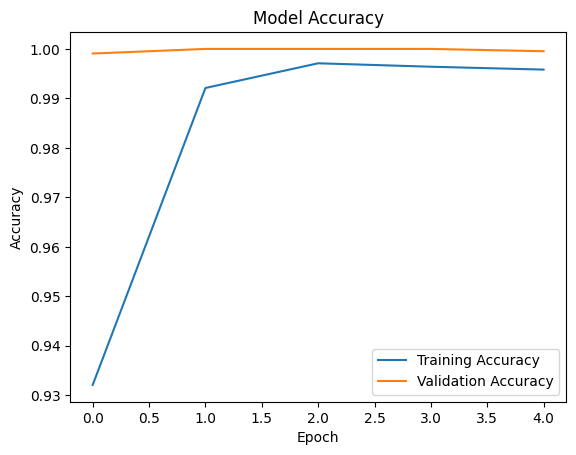

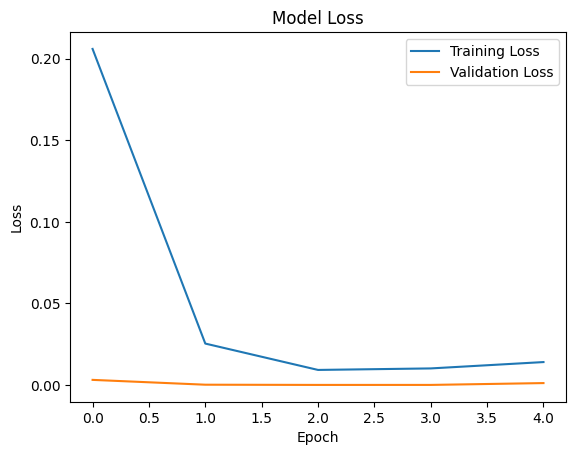

In [ ]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# SavedModel

Kode ini untuk menyimpan model kedalam direktori yang ditentukan, sehingga dapat diakses dan digunakan.
1. `tf.saved_model.save(model, 'saved_model')`
- Menyimpan model yang telah dilatih ke dalam format SavedModel. Format ini memungkikan model untuk dimuat kembali nanti dan digunakan untuk inferensi atau melanjutkan pelatihan.

In [ ]:
import tensorflow as tf

tf.saved_model.save(model, 'saved_model')

# TF-Lite

Kode ini membuat model Keras dan mengonversinya ke format TFLite untuk penggunaan yang lebih efisien pada perangkat ringan.
1. `model = tf.keras.models.load_model('hand_gesture_model.h5')`
- Memuat model yang telah disimpan sebelumnya dari file hand_gesture_model.h5. model ini sekarang siap digunakan untuk inferensi atau melanjutkan pelatihan.
2. `converter = tf.lite.TFLiteConverter.from_keras_model(model)`
`tflite_model = converter.convert()`
- `tf.lite.TFLiteConverter.from_keras_model(model)`, Membuat converter untuk mengubah model Keras ke format TensorFlow Lite (TFLite),
- `tflite_model = converter.convert()`, Mengonversi model Keras ke format TFlite, menghasilkan file model yang lebih ringat dan efisien.

In [ ]:
import tensorflow as tf


model = tf.keras.models.load_model('hand_gesture_model.h5')


converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


with open('hand_gesture_model.tflite', 'wb') as f:
    f.write(tflite_model)

with open('label.txt', 'w') as f:
    labels = train_generator.class_indices
    for label in labels:
        f.write(f'{label}\n')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'hand_gesture_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Format TFJS

Kode ini memungkikan model keras untuk digunakan dalam aplikasi berbasis web dengan mengonversinya keformat yang sesuai untuk TensorFlow.js.

1. `tfjs.converters.save_keras_model(model, 'hand_gesture_tfjs_model')`
- Mengonversi model keras yang telah dilatih dan menyimpannya dalam format yang dapat digunakan oleh TensorFlow.JS.

In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs

tfjs.converters.save_keras_model(model, 'hand_gesture_tfjs_model')

# Evaluasi Model

Kode ini digunakan untuk mengevaluasi akurasi model dataset validasi dan mencetak hasil akurasi.
1. `model.evaluate(validation_generator, verbose=2)`
- Menggunakan metode evaluate untuk mengukur kinerja model pada data validasi yang disediakan oleh validation_generator. fungsi ini mengembalikan dua nilai `test_loss` dan `test_acc`.
- `verbose=2`, Menentukan tingkat detail output yang akan ditampilkan saat evaluasi, dalam hal ini menampilkan hasil evaluasi per epoch.

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f"Test accuracy: {test_acc}")